<a href="https://colab.research.google.com/github/2060saha/Boston-House-Price-Prediction/blob/main/Boston_House_Price_Prediction_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To Predict The Boston House Price**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import os

In [ ]:
from google.colab import files  #We have to upload the dataset (that is, here,csv file)
uploaded = files.upload()

Saving boston.csv to boston.csv


In [ ]:
raw_df = pd.read_csv('boston.csv') # to import the dataset in the model.
raw_df.head() # head function will print the first 5 rows of the dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#to check the shape of the dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print("Count of Rows and Columns:", raw_df.shape) #'shape' returns a tuple where the first element is the number of rows and the second is the number of columns.

Count of Rows and Columns: (506, 14)


In [ ]:
raw_df.columns  #to check the column names in the dataset

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
raw_df.nunique() # nunique() method returns the number of unique values for each column.

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
raw_df.isnull().sum() # Since,sum() calculate as True=1 and False=0, you can count the number of missing values in each row and column by calling sum() from the result of isnull().

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
raw_df.describe() #describe() method returns description of the data in the DataFrame. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#The corr() method calculates the relationship between each column in your data set.
corr = raw_df.corr()
corr.shape     

(14, 14)

<Axes: >

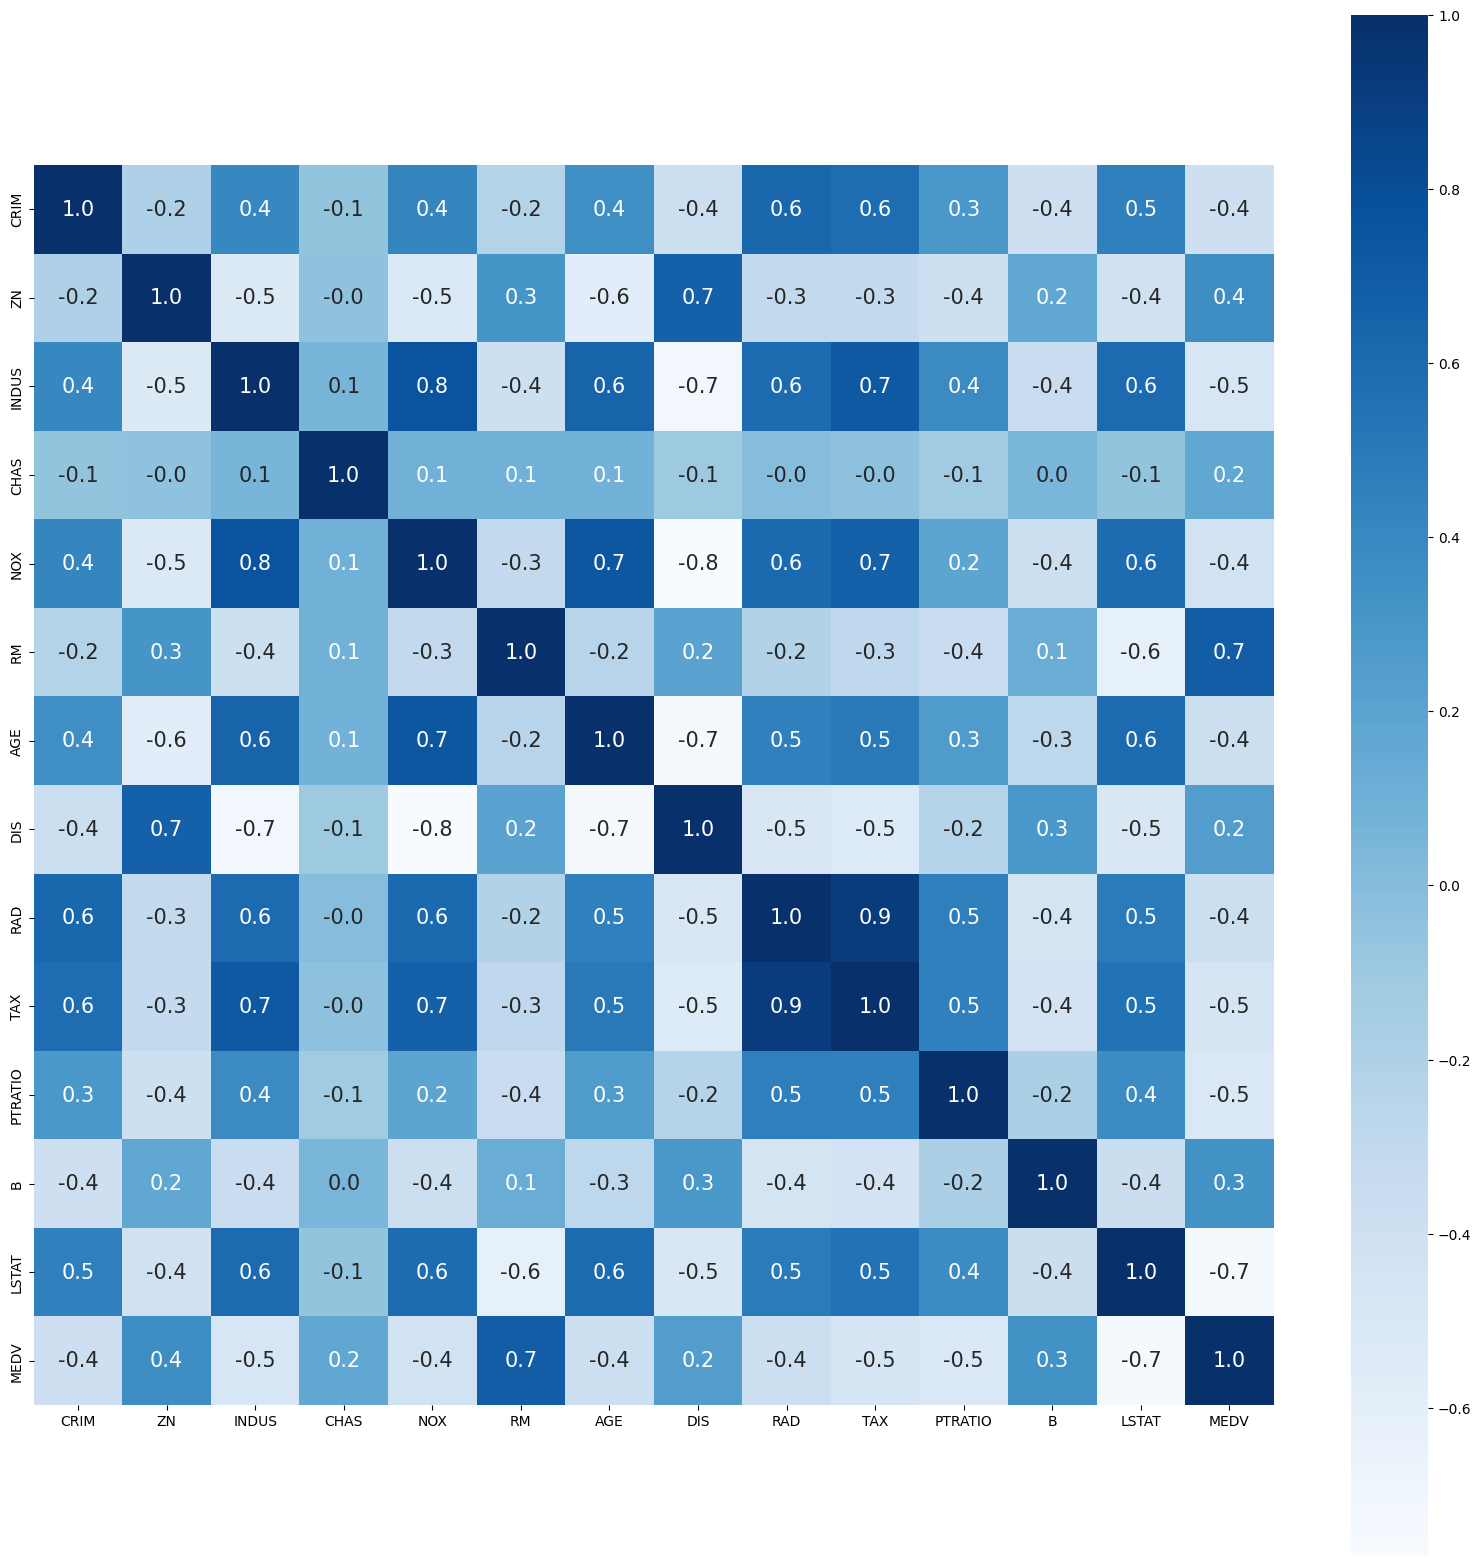

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [ ]:
#to split the target variable and independent variables
X=raw_df.drop("MEDV" , axis=1)
Y= raw_df["MEDV"]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
#To split into train and test data
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.25 , random_state = 1)

scaler = StandardScaler() #StandardScaler() removes the mean and scales each feature/variable to unit variance. 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
41     26.6
361    19.9
289    24.8
498    21.2
293    23.9
Name: MEDV, Length: 127, dtype: float64

We will use 2 Regression ML Algorithms for the given dataset, that is, Linear Regression and  Random Forest.

**Linear** **Regression**

In [ ]:
lr = LinearRegression()  #to import linear regression model
lr.fit(x_train , y_train)

lr_predicted= lr.predict(x_test)

print('Mean Squared Error: ', mean_squared_error(y_test, lr_predicted))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_predicted))
print('Median Absolute Error: ', median_absolute_error(y_test, lr_predicted))
print('R2 Score: ', r2_score(y_test, lr_predicted))

Mean Squared Error:  21.897765396049486
Mean Absolute Error:  3.574868126127543
Median Absolute Error:  3.037227980194487
R2 Score:  0.7789410172622858


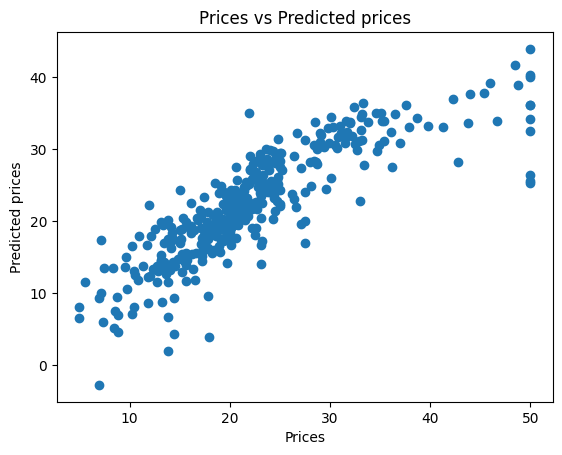

In [ ]:
#to visualize the difference between actual and predicted values.
y_pred = lr.predict(x_train)
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

**Random Forest Regressor**

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9799434365575204
Adjusted R^2: 0.9792290932020348
MAE: 0.8516332453825854
MSE: 1.591950108179419
RMSE: 1.261725052529044


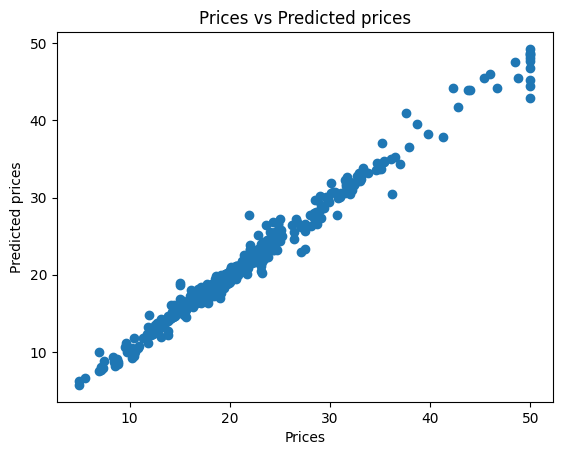

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

For Testing data(under Linear Regression model)

In [ ]:
# Predicting Test data with the model
y_test_pred = lr.predict(x_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7789410172622858
Adjusted R^2: 0.7535094528765311
MAE: 3.574868126127543
MSE: 21.897765396049486
RMSE: 4.679504823808763


For Testing Data(under Random Forest Regressor Model)

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [30]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9103113546959203
Adjusted R^2: 0.8999931919618226
MAE: 2.2649448818897633
MSE: 8.884420299212595
RMSE: 2.9806744705204884


**Evaluation and Comparison Of Both the** **Models**

In [32]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE Score': [acc_linreg*100, acc_rf*100]})
models.sort_values(by='RMSE Score', ascending=False)

,Model,RMSE Score
1,Random Forest,91.031135
0,Linear Regression,77.894102


Since, for comparing the accuracy among different  linear regression models, RMSE is a better choice than R Squared. So, according to the above results, random forest is better than linear regression machine learning model for this prediction of boston house price prediction.
